# Spatial analysis of SITP bus stops in Bogota

Author: Alejandro Nieves <br>
Project: Spatial analysis of SITP bus stops in Bogota <br>
Created: 2020/05/22 <br>
Purpose: To count how many SITP routes stop at each stop in the city. <br>

In [2]:
# Requirements

from bs4 import BeautifulSoup
from selenium import webdriver
import random
from time import sleep
import csv

In [15]:
url = "https://www.transmilenio.gov.co/buscador_de_rutas" # Seminal link 

url

'https://www.transmilenio.gov.co/buscador_de_rutas'

# Webscraping página TransMilenio

I will use 'Selenium' and Chrome's webdriver in two steps. In the first one, I will get the unique identifier of each stop (cenefa in Spanish and administrative identification) and the link to all SITP stops included in the TransMilenio page. Estimated execution time of the first stage: 3 hours.

In [45]:
driver = webdriver.Chrome(r'C:\phantomjs-2.1.1-windows\bin\chromedriver.exe')  # Optional argument, if not specified will search path.
driver.maximize_window()
driver.get('https://www.transmilenio.gov.co/buscador_de_rutas')

# Click on 'route finder → stops'

boton_paradero = driver.find_element_by_xpath('//a[@href="#paraderos"]')  # Stores the variable of the element containing the information about the stops.
boton_paradero.click()

# Sleep in order to not raise suspicions that the webdriver is a bot

sleep(random.uniform(8, 10))

# Next page

boton_siguiente = driver.find_element_by_xpath('//*[@id="tblPagineAjax_next"]/a')  # Set the next page link to click on each iteration.

sleep(random.uniform(8, 10))

links = []  # Initialize empty link list
cenefas = []  # Initialize empty list of borders

for i in range(1, 410): # There are 410 pages so it is necessary to perform the same procedure this number of times.
    
    sleep(random.uniform(0,1))
    links_base = driver.find_elements_by_xpath('//a[@class="changue-paraderos"]')
    
    for link in links_base:  # Loop to obtain the 20 links per page
        temp = str(link.get_attribute("href"))  # Attribute I am looking for in each link
        links.append(temp)  # Append link to list
        
        sleep(random.uniform(0,1.2))
        
        temp1 = str(link.get_attribute("innerText"))  # Attribute of the cenefa (unique identifier and also neighborhood name)
        cenefas.append(temp1)  # Append cenefa to list
        
    boton_siguiente.click()   
    sleep(random.uniform(5,5))
    boton_siguiente = driver.find_element_by_xpath('//*[@id="tblPagineAjax_next"]/a')
    
print(links)
print(cenefas)

sleep(5)
driver.quit()

['https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=7', 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=8', 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=12', 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=13', 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=14', 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=11', 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=15', 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=16', 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=17', 'https://www.transmilenio.gov.co/loader.php?lSe

In the previous loop, two variables are obtained (the cenefa or unique identifiers of the bus stops and their respective link). This loop takes some time to run (as more than 8000 bus stops are analyzed, including sleeping time) if you run the whole code. Then, you can choose to get each variable separately by pausing one of them as follows:

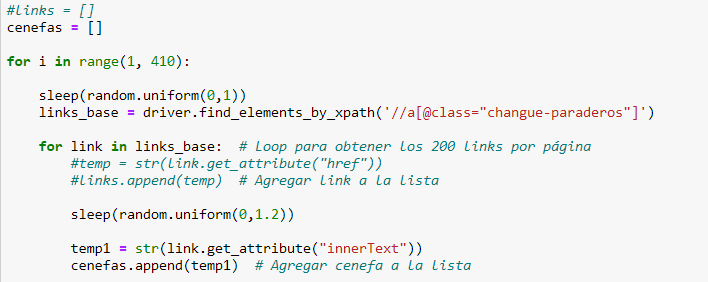

In [2]:
from IPython.display import Image
Image(filename="Captura1.png")

Then, as follows:

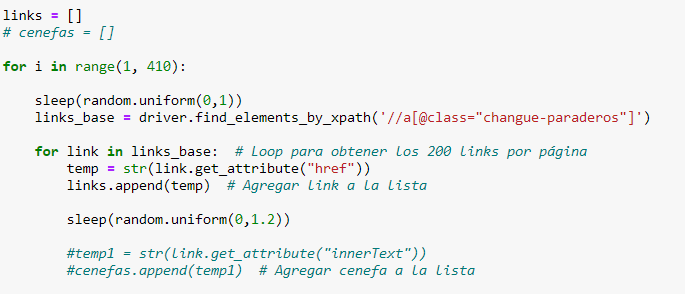

In [3]:
from IPython.display import Image
Image(filename="Captura2.png")

# Visualize results

In [46]:
links

['https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=7',
 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=8',
 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=12',
 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=13',
 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=14',
 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=11',
 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=15',
 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=16',
 'https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=17',
 'https://www.transmilenio.gov.co/loade

In [47]:
cenefas

['001A01 - Br. Rincón del Chicó',
 '001B01 - Br. Rincón del Chicó',
 '093A02 - Br. Estoril',
 '093B02 - Br. Estoril',
 '093C02 - Br. Estoril',
 '122A01 - Autopista Norte',
 '136A02 - C.C. Iserra 100',
 '136B02 - C.C. Iserra 100',
 '136C02 - C.C. Iserra 100',
 '158A01 - Br. Chicó Navarra',
 '160A01 - Escuela de Infantería',
 '160B01 - Escuela de Infantería',
 '161A01 - Urb. Conjunto de La 100',
 '161B01 - Urb. Conjunto de La 100',
 '162A01 - Escuela de Infantería',
 '162B01 - Escuela de Infantería',
 '173A03 - Br. Andes Norte',
 '173B03 - Br. Andes Norte',
 '173C03 - Pq. Andes Norte',
 '242A01 - Br. Santa Bibiana',
 '001A00 - C.C. Iserra 100',
 '001A03 - Br. Julio Flórez',
 '001B00 - C.C. Iserra 100',
 '001B03 - Br. Julio Flórez',
 '001C00 - C.C. Iserra 100',
 '001C03 - Br. Julio Flórez',
 '165A03 - Estación Suba - Calle 100',
 '165B03 - Estación Suba - Calle 100',
 '165C03 - Estación Suba - Calle 100',
 '170A03 - Br. Los Andes',
 '170B03 - Br. Los Andes',
 '170C03 - Br. Los Andes',
 '1

# Number of cenefas and links obtained

As the cenefas and links are stored in a list, I proceed to convert them into a database using pandas

In [48]:
print(len(cenefas),len(links))

8180 8180


In [49]:
# Convertir los datos de Cenefas y links a una base de datos:

import pandas as pd

base = pd.DataFrame(
    {'Cenefas': cenefas,
     'Enlaces': links,
    })

base

,Cenefas,Enlaces
0,001A01 - Br. Rincón del Chicó,https://www.transmilenio.gov.co/loader.php?lSe...
1,001B01 - Br. Rincón del Chicó,https://www.transmilenio.gov.co/loader.php?lSe...
2,093A02 - Br. Estoril,https://www.transmilenio.gov.co/loader.php?lSe...
3,093B02 - Br. Estoril,https://www.transmilenio.gov.co/loader.php?lSe...
4,093C02 - Br. Estoril,https://www.transmilenio.gov.co/loader.php?lSe...
...,...,...
8175,674A09 - Br. Carvajal,https://www.transmilenio.gov.co/loader.php?lSe...
8176,675A09 - Br. Carimagua I Sector,https://www.transmilenio.gov.co/loader.php?lSe...
8177,876A00 - Br. La Castellana,https://www.transmilenio.gov.co/loader.php?lSe...
8178,886A00 - Chicó Reservado,https://www.transmilenio.gov.co/loader.php?lSe...


In [59]:
# Get border ID and separate it from neighborhood name

base[['id', 'Nombre', 'Other']] = base['Cenefas'].str.split(' - ', expand=True)
base

,Cenefas,Enlaces,id,Nombre,Other
0,001A01 - Br. Rincón del Chicó,https://www.transmilenio.gov.co/loader.php?lSe...,001A01,Br. Rincón del Chicó,None
1,001B01 - Br. Rincón del Chicó,https://www.transmilenio.gov.co/loader.php?lSe...,001B01,Br. Rincón del Chicó,None
2,093A02 - Br. Estoril,https://www.transmilenio.gov.co/loader.php?lSe...,093A02,Br. Estoril,None
3,093B02 - Br. Estoril,https://www.transmilenio.gov.co/loader.php?lSe...,093B02,Br. Estoril,None
4,093C02 - Br. Estoril,https://www.transmilenio.gov.co/loader.php?lSe...,093C02,Br. Estoril,None
...,...,...,...,...,...
8175,674A09 - Br. Carvajal,https://www.transmilenio.gov.co/loader.php?lSe...,674A09,Br. Carvajal,None
8176,675A09 - Br. Carimagua I Sector,https://www.transmilenio.gov.co/loader.php?lSe...,675A09,Br. Carimagua I Sector,None
8177,876A00 - Br. La Castellana,https://www.transmilenio.gov.co/loader.php?lSe...,876A00,Br. La Castellana,None
8178,886A00 - Chicó Reservado,https://www.transmilenio.gov.co/loader.php?lSe...,886A00,Chicó Reservado,None


In [60]:
# Save as .csv

base.to_csv('Paraderos SITP.csv', encoding='utf-8')

In [61]:
base

,Cenefas,Enlaces,id,Nombre,Other
0,001A01 - Br. Rincón del Chicó,https://www.transmilenio.gov.co/loader.php?lSe...,001A01,Br. Rincón del Chicó,None
1,001B01 - Br. Rincón del Chicó,https://www.transmilenio.gov.co/loader.php?lSe...,001B01,Br. Rincón del Chicó,None
2,093A02 - Br. Estoril,https://www.transmilenio.gov.co/loader.php?lSe...,093A02,Br. Estoril,None
3,093B02 - Br. Estoril,https://www.transmilenio.gov.co/loader.php?lSe...,093B02,Br. Estoril,None
4,093C02 - Br. Estoril,https://www.transmilenio.gov.co/loader.php?lSe...,093C02,Br. Estoril,None
...,...,...,...,...,...
8175,674A09 - Br. Carvajal,https://www.transmilenio.gov.co/loader.php?lSe...,674A09,Br. Carvajal,None
8176,675A09 - Br. Carimagua I Sector,https://www.transmilenio.gov.co/loader.php?lSe...,675A09,Br. Carimagua I Sector,None
8177,876A00 - Br. La Castellana,https://www.transmilenio.gov.co/loader.php?lSe...,876A00,Br. La Castellana,None
8178,886A00 - Chicó Reservado,https://www.transmilenio.gov.co/loader.php?lSe...,886A00,Chicó Reservado,None


In [81]:
# Obtener información sobre el paradero

parada = "https://www.transmilenio.gov.co/loader.php?lServicio=Rutas&lTipo=busqueda&lFuncion=paradas&paradero=10"

# Second stage: How many routes stop at each bus stop in Bogota?

At this stage, I will use 'Selenium' and Chrome's webdriver to obtain the cenefa (unique identifier), neighborhood name and the number of routes that stop at each stop. Considering that there are 8180 links I will define a function to apply to the list. Estimated execution time: 30 hours.

In [127]:
def obtenerFrecuencia(paradero):
    
    driver = webdriver.Chrome(r'C:\phantomjs-2.1.1-windows\bin\chromedriver.exe')  # Optional argument, if not specified will search path.
    driver.get(paradero)

    # Sleep to allow the page to load completely.

    sleep(random.uniform(0, 0.3))

    # Define variable containing the identifier information

    id_base = driver.find_elements_by_xpath('//h3[@class="focus"]')

    # Loop to obtain bus stop's cenefa

    variableunica = ""
    
    for info in id_base:
        variableunica = str(info.get_attribute("outerText"))

    # To obtain the routes of each bus stop

    rutas_base = driver.find_elements_by_xpath('//div[@class="containerCodigo"]')
    frec = len(rutas_base)

    # Sleep

    sleep(random.uniform(0, 0.3))

    # Finish

    driver.quit()
    
    return variableunica, frec

In [128]:
obtenerFrecuencia(parada)

('Rutas que paran en el paradero 242A01 - Br. Santa Bibiana', 20)

For a single bus stop we obtain this result. However, we have to apply this function to 8180 links.

In [96]:
import time

In [136]:
start = time.time()

# Lista vacía

todaslascenefas = []

for link in links:
    temp = obtenerFrecuencia(link)
    todaslascenefas.append(temp)

end = time.time()

# Visualize results

In [138]:
todaslascenefas

[('Rutas que paran en el paradero 001A01 - Br. Rincón del Chicó', 20),
 ('Rutas que paran en el paradero 001B01 - Br. Rincón del Chicó', 7),
 ('Rutas que paran en el paradero 093A02 - Br. Estoril', 7),
 ('Rutas que paran en el paradero 093B02 - Br. Estoril', 6),
 ('Rutas que paran en el paradero 093C02 - Br. Estoril', 9),
 ('Rutas que paran en el paradero 122A01 - Autopista Norte', 20),
 ('Rutas que paran en el paradero 136A02 - C.C. Iserra 100', 6),
 ('Rutas que paran en el paradero 136B02 - C.C. Iserra 100', 7),
 ('Rutas que paran en el paradero 136C02 - C.C. Iserra 100', 10),
 ('Rutas que paran en el paradero 158A01 - Br. Chicó Navarra', 16),
 ('Rutas que paran en el paradero 160A01 - Escuela de Infantería', 4),
 ('Rutas que paran en el paradero 160B01 - Escuela de Infantería', 6),
 ('Rutas que paran en el paradero 161A01 - Urb. Conjunto de La 100', 7),
 ('Rutas que paran en el paradero 161B01 - Urb. Conjunto de La 100', 6),
 ('Rutas que paran en el paradero 162A01 - Escuela de Infa

In [152]:
# Convert list of tuples to dataframe

dataframe2 = pd.DataFrame(todaslascenefas, columns=['Paradero', 'Frecuencia'])
dataframe2

,Paradero,Frecuencia
0,Rutas que paran en el paradero 001A01 - Br. Ri...,20
1,Rutas que paran en el paradero 001B01 - Br. Ri...,7
2,Rutas que paran en el paradero 093A02 - Br. Es...,7
3,Rutas que paran en el paradero 093B02 - Br. Es...,6
4,Rutas que paran en el paradero 093C02 - Br. Es...,9
...,...,...
8175,Rutas que paran en el paradero 674A09 - Br. Ca...,1
8176,Rutas que paran en el paradero 675A09 - Br. Ca...,2
8177,Paradero 876A00 - Br. La Castellana,0
8178,Paradero 886A00 - Chicó Reservado,0


Dataframe's extension: 8180 rows.

In [154]:
# Delete extra content in the bus stop column (paradero): 
dataframe2["Paradero"] = dataframe2["Paradero"].str.replace("Rutas que paran en el paradero ", "")
dataframe2["Paradero"] = dataframe2["Paradero"].str.replace("Paradero ", "")
dataframe2

,Paradero,Frecuencia
0,001A01 - Br. Rincón del Chicó,20
1,001B01 - Br. Rincón del Chicó,7
2,093A02 - Br. Estoril,7
3,093B02 - Br. Estoril,6
4,093C02 - Br. Estoril,9
...,...,...
8175,674A09 - Br. Carvajal,1
8176,675A09 - Br. Carimagua I Sector,2
8177,876A00 - Br. La Castellana,0
8178,886A00 - Chicó Reservado,0


In [159]:
# Separate border identifier from neighborhood name
dataframe2[['id','Nombre','Other']] = dataframe2["Paradero"].str.split(" - ",expand=True,)
dataframe2

,Paradero,Frecuencia,id,Nombre,Other
0,001A01 - Br. Rincón del Chicó,20,001A01,Br. Rincón del Chicó,None
1,001B01 - Br. Rincón del Chicó,7,001B01,Br. Rincón del Chicó,None
2,093A02 - Br. Estoril,7,093A02,Br. Estoril,None
3,093B02 - Br. Estoril,6,093B02,Br. Estoril,None
4,093C02 - Br. Estoril,9,093C02,Br. Estoril,None
...,...,...,...,...,...
8175,674A09 - Br. Carvajal,1,674A09,Br. Carvajal,None
8176,675A09 - Br. Carimagua I Sector,2,675A09,Br. Carimagua I Sector,None
8177,876A00 - Br. La Castellana,0,876A00,Br. La Castellana,None
8178,886A00 - Chicó Reservado,0,886A00,Chicó Reservado,None


# Join the databases built in the two stages

In [173]:
# Merge the databases by common variables:

result = pd.merge(base, dataframe2, on=['id', 'Nombre', 'Other'], how="inner")

# Drop extra columns

result.drop(['Cenefas','Other', 'Paradero'], axis=1, inplace=True)

# Reorder columns

result = result[['id','Nombre','Frecuencia','Enlaces']]

# Rename some columns

result.rename(columns={'id':'Cenefa',
                          'Nombre':'Barrio',
                          'Enlaces':'Enlace'}, 
                 inplace=True)
 
result

,Cenefa,Barrio,Frecuencia,Enlace
0,001A01,Br. Rincón del Chicó,20,https://www.transmilenio.gov.co/loader.php?lSe...
1,001B01,Br. Rincón del Chicó,7,https://www.transmilenio.gov.co/loader.php?lSe...
2,093A02,Br. Estoril,7,https://www.transmilenio.gov.co/loader.php?lSe...
3,093B02,Br. Estoril,6,https://www.transmilenio.gov.co/loader.php?lSe...
4,093C02,Br. Estoril,9,https://www.transmilenio.gov.co/loader.php?lSe...
...,...,...,...,...
8121,674A09,Br. Carvajal,1,https://www.transmilenio.gov.co/loader.php?lSe...
8122,675A09,Br. Carimagua I Sector,2,https://www.transmilenio.gov.co/loader.php?lSe...
8123,876A00,Br. La Castellana,0,https://www.transmilenio.gov.co/loader.php?lSe...
8124,886A00,Chicó Reservado,0,https://www.transmilenio.gov.co/loader.php?lSe...


In [175]:
# Save database

result.to_csv('Frecuencia paraderos.csv', encoding='utf-8')

-------

The database constructed in this Notebook is the main input for this work. The frequency will be used to classify the bus stops into six types and will be the indicator to be evaluated at different levels of geographic aggregation in Bogota.

-------